In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 
from itertools import cycle

In [2]:
%run metapop.py

## Figure 2 a

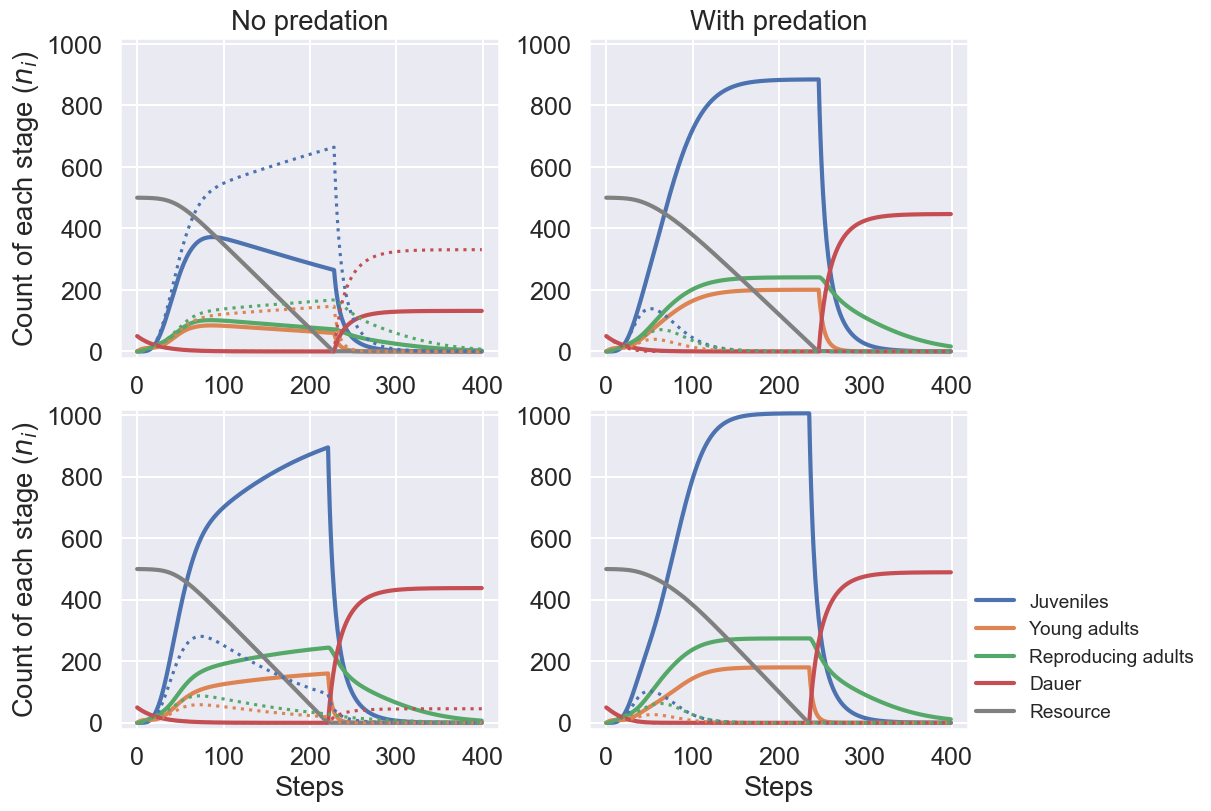

In [3]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12, 8),
    constrained_layout=True)

axes = axes.flatten()

for i in axes:
    i.set_ylim(-20, 1020)

r_init = 500
ρ = 0.002
time = 400
fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}

n0 = np.array([[0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, fec_pars, mf_prob, consumption=ρ,  r0=r_init, α=0.0)
pop.diet = 'OP50'
n_list = []
r_list = []
for i in range(time):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[0].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[0].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[0].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[0].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[0].plot(r_list, lw=3, color='gray', label='Resource')


axes[0].plot([m[1][0] for m in n_list], color=sns.color_palette()[0], ls='dotted')
axes[0].plot([m[3][0] for m in n_list], color=sns.color_palette()[1], ls='dotted')
axes[0].plot([np.sum(m[4:9]) for m in n_list],color=sns.color_palette()[2], ls='dotted')
axes[0].plot([m[2][0] for m in n_list],color=sns.color_palette()[3], ls='dotted')

n0 = np.array([[0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, fec_pars, mf_prob, consumption=ρ,  r0=r_init, α=1e-3)
pop.diet = 'OP50'
n_list = []
r_list = []
for i in range(time):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[1].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[1].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[1].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[1].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[1].plot(r_list, lw=3, color='gray', label='Resource')
axes[1].plot([m[1][0] for m in n_list], color=sns.color_palette()[0], ls='dotted')
axes[1].plot([m[3][0] for m in n_list], color=sns.color_palette()[1], ls='dotted')
axes[1].plot([np.sum(m[4:9]) for m in n_list],color=sns.color_palette()[2], ls='dotted')
axes[1].plot([m[2][0] for m in n_list],color=sns.color_palette()[3], ls='dotted')


n0 = np.array([[0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, fec_pars, mf_prob, consumption=ρ,  r0=r_init, α=0)
pop.diet = 'Novo'
n_list = []
r_list = []
for i in range(time):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()
    
axes[2].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[2].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[2].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[2].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[2].plot(r_list, lw=3, color='gray', label='Resource')


axes[2].plot([m[1][0] for m in n_list], color=sns.color_palette()[0], ls='dotted')
axes[2].plot([m[3][0] for m in n_list], color=sns.color_palette()[1], ls='dotted')
axes[2].plot([np.sum(m[4:9]) for m in n_list],color=sns.color_palette()[2], ls='dotted')
axes[2].plot([m[2][0] for m in n_list],color=sns.color_palette()[3], ls='dotted')


n0 = np.array([[0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, fec_pars, mf_prob, consumption=ρ,  r0=r_init, α=1e-3)
pop.diet = 'Novo'
n_list = []
r_list = []
for i in range(time):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[3].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[3].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[3].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[3].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[3].plot(r_list, lw=3, color='gray', label='Resource')
axes[3].plot([m[1][0] for m in n_list], color=sns.color_palette()[0], ls='dotted')
axes[3].plot([m[3][0] for m in n_list], color=sns.color_palette()[1], ls='dotted')
axes[3].plot([np.sum(m[4:9]) for m in n_list],color=sns.color_palette()[2], ls='dotted')
axes[3].plot([m[2][0] for m in n_list],color=sns.color_palette()[3], ls='dotted')

axes[3].legend(loc=(1, 0), frameon=False, fontsize='x-small')

for i in axes[2:]:
    i.set_xlabel('Steps')

for i in [0,2]:
    axes[i].set_ylabel(r'Count of each stage ($n_i$)')
    
axes[0].set(title='No predation')

axes[1].set(title='With predation');

## Figure 2C

- with $\Omega > 0$

KeyboardInterrupt: 

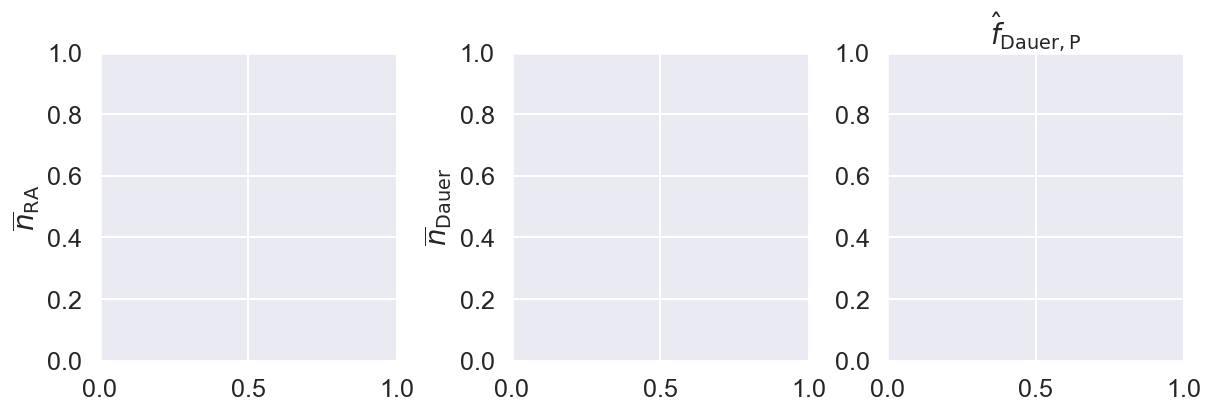

In [8]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(12, 4),
    constrained_layout=True)

axes = axes.flatten()
    
axes[0].set_ylabel(r'$\overline{n}_{\mathrm{RA}}}$', fontsize=20)
axes[1].set_ylabel(r'$\overline{n}_{\mathrm{Dauer}}}$')
axes[2].set_title(r'$\hat{f}_{\mathrm{Dauer}, \mathrm{P}}$')

fec_pars = {'A': {'OP50': [22.65, 68.45, 57.05, 33.4,  4.97], 'Novo': [11.66, 62.53, 47.13, 13.94,  0.72]},
            'C': {'OP50': [19.8 , 60.3 , 43.02, 19.9,  6.6], 'Novo': [16.88, 80.77, 77.7 , 16.28,  1.4]}}

mf_prob = {'A': {'OP50': 0.11, 'Novo': 0.83}, 'C': {'OP50': 1.0, 'Novo': 1.0}}
disp_rate = [0.01, 0.01]
dim = 20
metpop = MetaPopulation(dim, fec_pars, mf_prob, r_rate=disp_rate, pred_rate=2)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('OP50')

dis_t = []
dis_a = []
time = 1500
for i in range(time):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dis_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.disperse_dauer()
    
axes[0].plot([np.mean(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.mean(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc='best', frameon=False, fontsize='x-small')

axes[1].plot([np.mean(i[0]) for i in dis_t], lw=3, label="Strain P")
axes[1].plot([np.mean(i[1]) for i in dis_t], lw=3, label="Strain NP")


sns.heatmap(np.divide(dis_t[-1][0], dis_t[-1][0] + dis_t[-1][1]), ax=axes[2], vmin=0, vmax=1, cbar_kws={'ticks':[0, 0.5, 1], 'location':'right', 'shrink':0.4, 'pad':0.05}, square=True)
axes[2].set_yticks(np.linspace(0, dim, dim))
axes[2].set_xticks(np.linspace(0, dim, dim))
yticks = axes[2].get_yticks()
axes[2].set_yticklabels(['' for i in yticks])
xticks = axes[2].get_xticks()
axes[2].set_xticklabels(['' for i in xticks])


    
for i in [0, 1]:
    axes[i].set_xlabel('Steps')
    axes[i].set_xticks(np.linspace(0, time, 4))
    
axes[0].set_yticks(np.linspace(0, 150, 6))
    
axes[1].set_yticks(np.linspace(0, 220, 6));